In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from mod1 import ebm_annual, effect_D_ebm, insolation
from mod1 import response_initial_perturbation, response_CO2_levels
from mod1 import ebm_solar_sensitivity, make_fig_cool_warm
import netCDF4 as nc
from scipy.stats import linregress

# 1/ standard parameters
ifig=1; # if = 1 then make figures
time_kyr=0 # present day insolation (T=0), 115 kyr ago (T=115), etc
resu_solar = insolation(time_kyr,ifig=0) # compute incident solar flux at TOA
S0=1365.0 # solar constant W/m2
folr=0 # OLR: 0: linear (A+BT_s), 1: stefan_boltzmann (epsilon * black body radiation)
falb=2; # 0: constant, 1: Legendre, 2: Legendre_T, 3: NCEP (not yet implemented)
fkdif=0; # turbulent diffusivity (profile) 0: constant, 1: variable (depends on dT/dy)
epsilon_p=0.61; # emissivity at TOA (used only with folr=1)
epsilon_a=0.80; # absorptivity/emissivity (infrared) in the interior of atmosphere (default value is 0.80)
epsilon_o=1.00; # absorptivity/emissivity (infrared) at the sea surface (default value is 1.0)
esun=0.20; # absorptivity of solar radiation (default value is 0.2)
A=200 # W/m2 used when folr=0 (A+BT_s)
B=2.0 # W/m2/K used when folr=0 (A+BT_s) Below you will find the correct values of A and B to be used
D=1.0; # atmospheric eddy diffusivity (W/m2/K) [Note that this is not the correct value to be used...]
#D=2.0e+04; # diffusive coefficient (m2/s/K) when K is variable
nyears=5.0 # time integration (years)
dt=2.0 # days (time step, default value is 2 days)
radp=0.0 # radiative forcing W/m2 = perturbation in OLR (greenhouse effect)
restart=0 # if set to 1 we have to provide initial conditions for SST(phi) and SAT(phi) with phi the latitude
sati=0.0 # initial SAT (used only with restart=1)
ssti=0.0 # initial SST (used only with restart=1)
lambda_T=30.0 # 0: atmos-only run, # 1: atmosphere + ocean mixed layer
ho=5.0 # ocean mixed layer depth (we use a very shallow ocean layer to save computer time
#        --> seek only eq. solutions)
aoht=0.0e15 # Maximum Poleward Ocean Heat Transport (Watts)

param = {'ifig':ifig,'time_kyr':time_kyr,'folr':folr,'falb':falb,'fkdif':fkdif,'A':A,'B':B,\
         'epsilon_p':epsilon_p,'epsilon_a':epsilon_a,'epsilon_o':epsilon_o,'esun':esun,'D':D,\
         'nyears':nyears,'dt':dt,'S0':S0,'radp':radp,'restart':restart,'ssti':ssti,'sati':sati,\
         'resu_solar':resu_solar,'lambda_T':lambda_T,'ho':ho,'aoht':aoht}

insolation at  0  kyr before present
eccentricity= 0.017236
obliquity= 23.446
longitude of perihelion= 281.37
solar constant= 1365 W/m2
Summer solstice is on MONTH  6.0  DAY  22.0
True longitude at summer solstice is  90.1240085454643 degrees


In [2]:
# (a) linear regression of observed OLR onto surface temperature

dirobs=str('data')
ncep_ts = nc.Dataset(dirobs + str('/skt.sfc.mon.1981-2010.ltm.nc'))
ncep_olr = nc.Dataset(dirobs + str('/ulwrf.ntat.mon.1981-2010.ltm.nc'))
ts=np.mean(ncep_ts['skt'],axis=0) # annual mean
olr=np.mean(ncep_olr['ulwrf'],axis=0) # annual mean

# make a linear regression of OLR on TS to find A and B
# You can use "linregress" from "scipy.stats"
from scipy.stats import linregress
import matplotlib.pyplot as plt
print(np.shape(ts))
print(np.shape(olr))
BB, AA, r_value, p_value, std_err = linregress(ts.flatten(), olr.flatten())
#linregress?
#plt.scatter()
print('Best fit is A = '+ '%0.0f' %AA +' W/m2 and B = '+ '%0.1f' %BB +' W/m2/degC')

(94, 192)
(94, 192)
Best fit is A = 214 W/m2 and B = 1.6 W/m2/degC


In [3]:
# Before running the model you need to define A and B
# Update then the parameter dictionary "param"
# The value of D will be found below...
A=214.0
B=1.6
param.update({'A':A,'B':B})

D = 0.2  W/m2/K
Radiative imbalance at TOA =  -0.018832307889332406  W/m2
solar constant = 1365.0 W/m2
global average SAT = 6.314664877406635 deg.C
global average SST = 9.264853231853568 deg.C
global average OLR = 224.10346380385073 W/m2
global average ASR = 224.08463149596136 W/m2
Iceline: SH = -47.0 deg. lat. / NH = 47.0 deg. lat.
 
D = 0.25  W/m2/K
Radiative imbalance at TOA =  -0.004380272861293163  W/m2
solar constant = 1365.0 W/m2
global average SAT = 8.162942559084689 deg.C
global average SST = 11.153440726062222 deg.C
global average OLR = 227.06070809453547 W/m2
global average ASR = 227.05632782167427 W/m2
Iceline: SH = -50.0 deg. lat. / NH = 50.0 deg. lat.
 
D = 0.3  W/m2/K
Radiative imbalance at TOA =  -0.004666539747487266  W/m2
solar constant = 1365.0 W/m2
global average SAT = 9.272410395642403 deg.C
global average SST = 12.290121567269592 deg.C
global average OLR = 228.8358566330279 W/m2
global average ASR = 228.83119009328044 W/m2
Iceline: SH = -52.0 deg. lat. / NH = 52.0

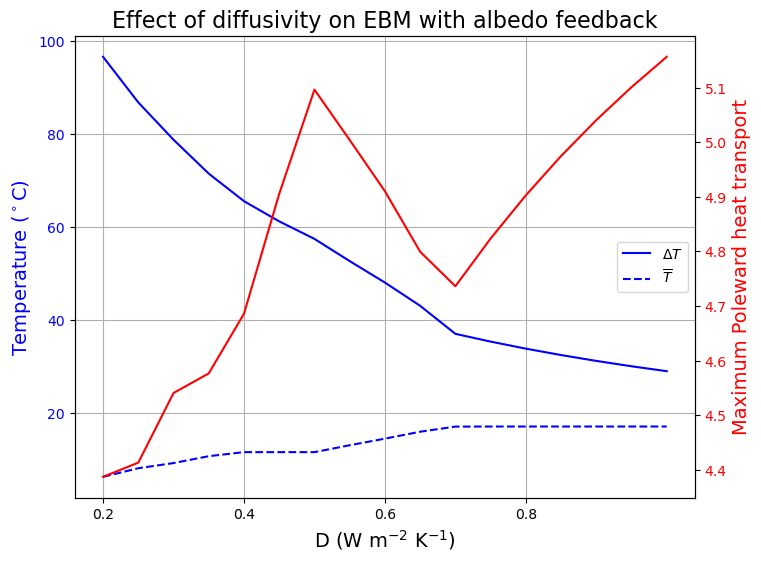

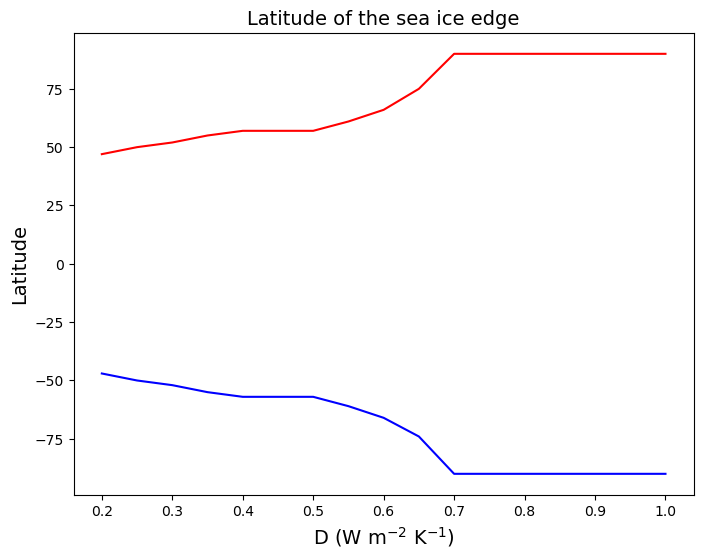

In [7]:
# (b) effect of diffusivity in the annual mean EBM with albedo feedback
param.update({'radp':0.0,'ifig':0,'aoht':0.0})
Darray = np.arange(0.20, 1.05, 0.05)
effect_D_ebm(Darray,param)

In [8]:
# For which value of D is the meridional temperature contrast about 50 deg.C ?
# Set the value of D here and update the parameters
D=0.6
param.update({'D':D})
K = 0.6*6.37**2*10**5
print(K/(10**6))

2.434614


Radiative imbalance at TOA =  0.02648662862174962  W/m2


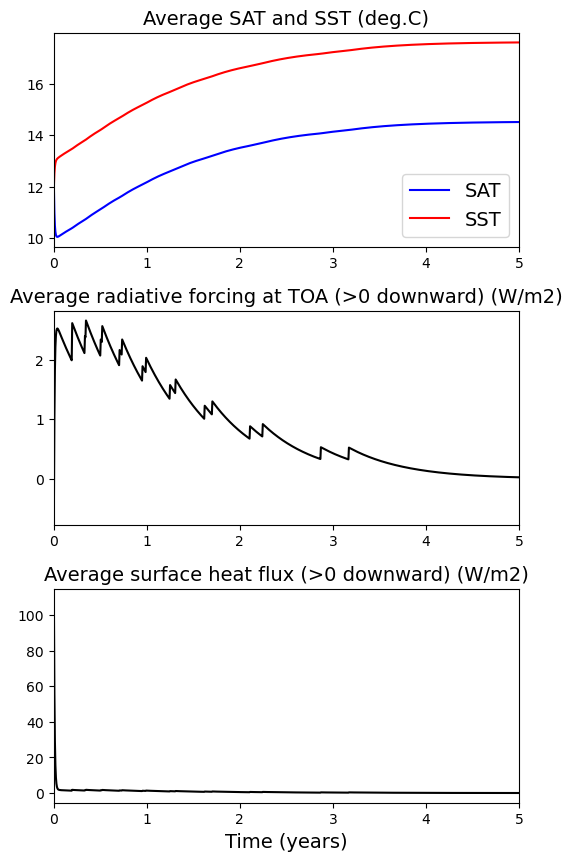

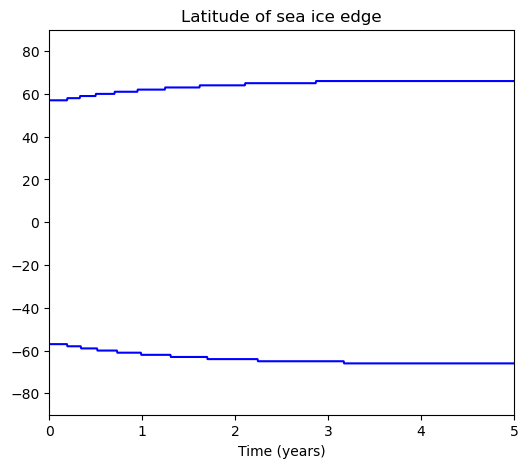

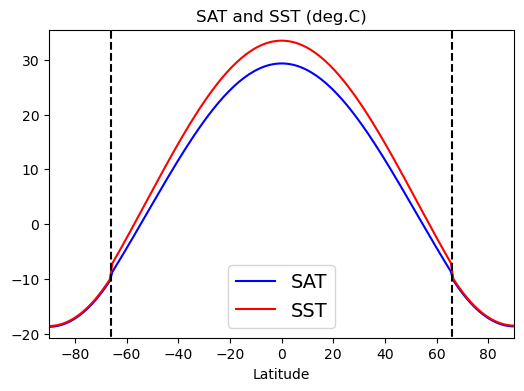

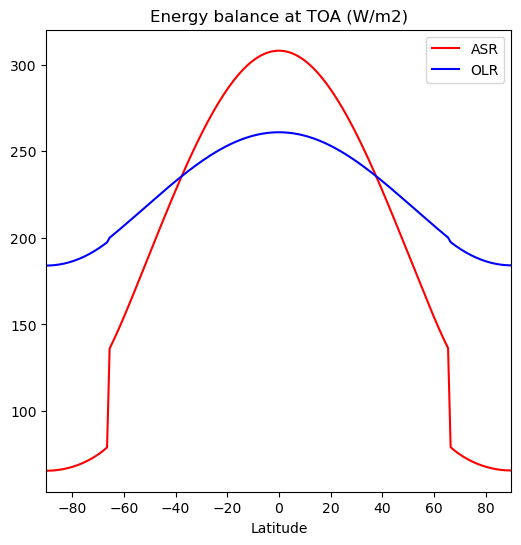

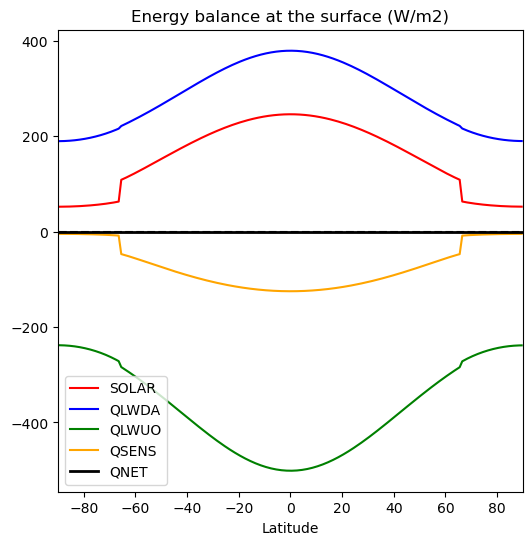

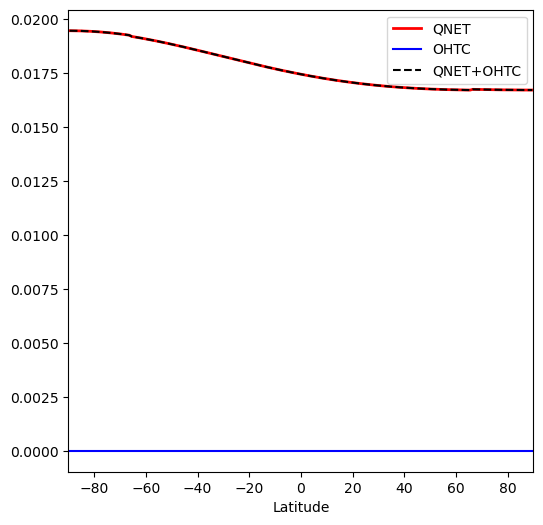

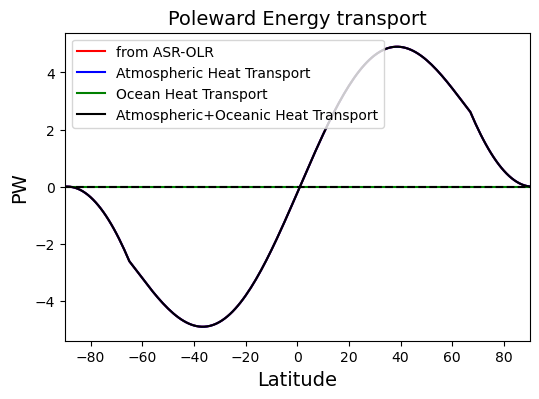

solar constant = 1365.0 W/m2
global average SAT = 14.518110877299385 deg.C
global average SST = 17.619753641893944 deg.C
global average OLR = 237.2289774036791 W/m2
global average ASR = 237.25546403230086 W/m2
Iceline: SH = -66.0 deg. lat. / NH = 66.0 deg. lat.
 


In [9]:
# (c) Control experiment
#we arrive at a equilibrium in the ocean very quicly cf Average radiative forcing
#aoht is the transport of heat
#here we study for ho = 10m
param.update({'aoht':0.0,'ifig':1})
resu0=ebm_annual(param)

Radiative imbalance at TOA =  0.009786628841947424  W/m2


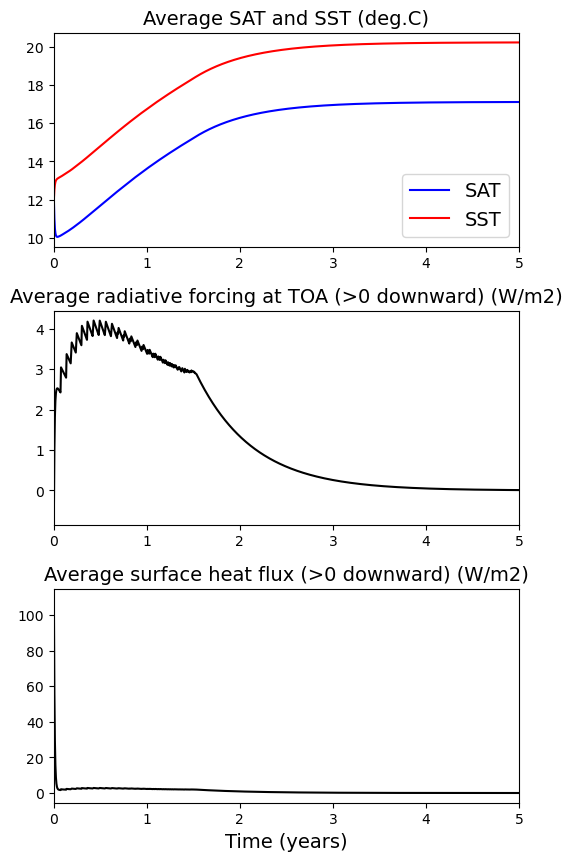

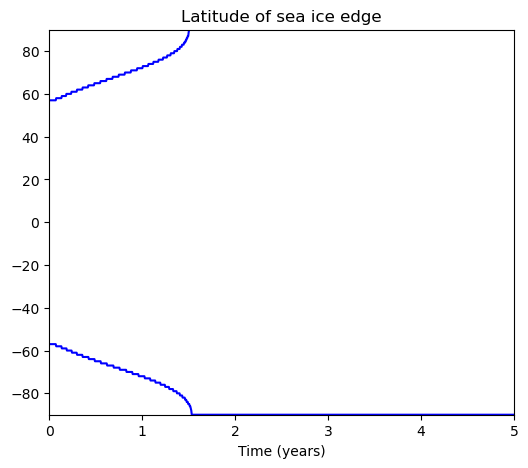

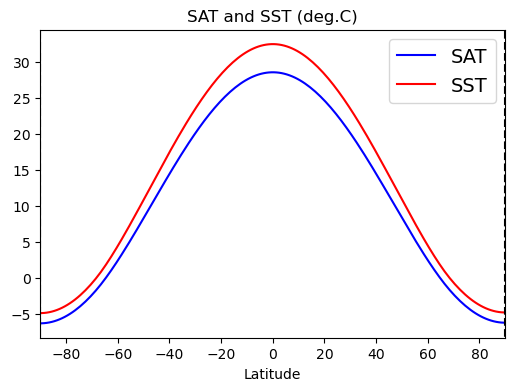

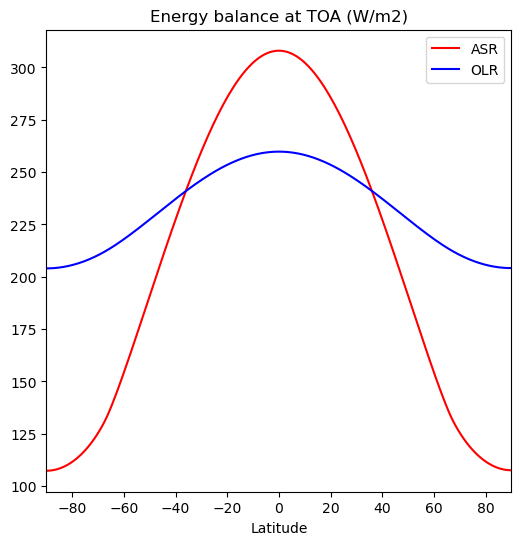

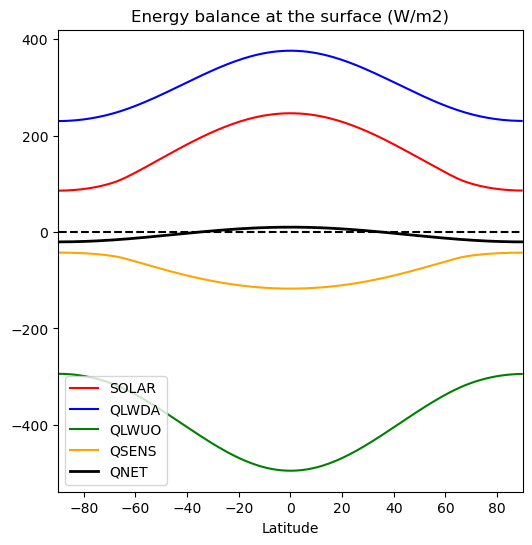

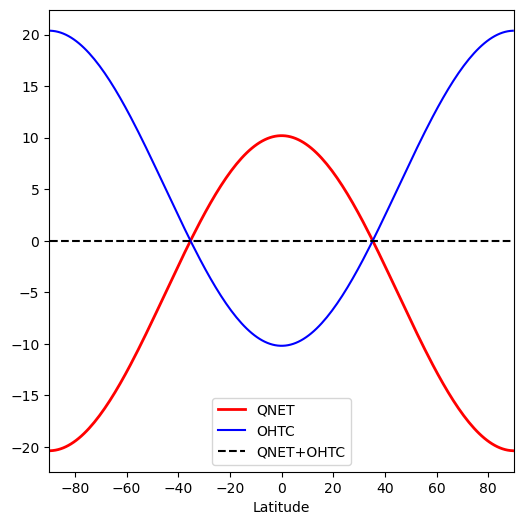

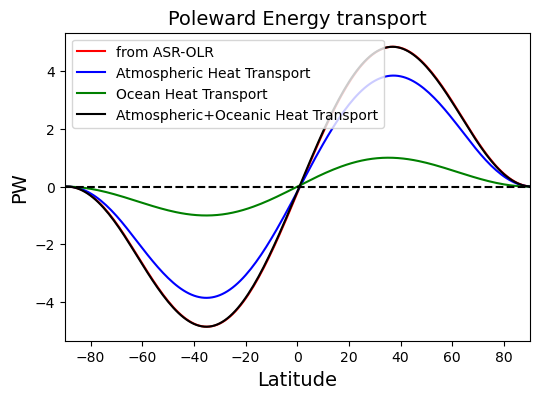

solar constant = 1365.0 W/m2
global average SAT = 17.122162226398277 deg.C
global average SST = 20.249983687669452 deg.C
global average OLR = 241.39545956223736 W/m2
global average ASR = 241.40524619107936 W/m2
Iceline: SH = -90.0 deg. lat. / NH = 90.0 deg. lat.
 


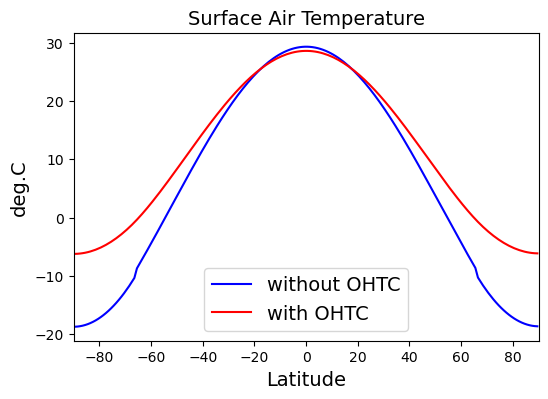

In [10]:
# (d) Same as (c) but with Ocean Heat Transport Convergence
#     maximum poleward oceanic heat transport of 1 PW (1 PW = 10^{15} Watts)

param.update({'aoht':1.0e15})
resu0_aoht=ebm_annual(param)

# compare SAT between the cases with and without OHTC
plt.figure(figsize=(6,4))
plt.plot(resu0['lat'],resu0['sat'][:,-1],'b',label='without OHTC')
plt.plot(resu0_aoht['lat'],resu0_aoht['sat'][:,-1],'r',label='with OHTC')
plt.legend(loc='best',fontsize=14)
plt.xlabel('Latitude',fontsize=14)
plt.ylabel('deg.C',fontsize=14)
plt.xlim(-90,90)
plt.title('Surface Air Temperature',fontsize=14)
plt.show(block=False)

CO2 x 1
Radiative imbalance at TOA =  0.02648662862174962  W/m2
solar constant = 1365.0 W/m2
global average SAT = 14.518110877299385 deg.C
global average SST = 17.619753641893944 deg.C
global average OLR = 237.2289774036791 W/m2
global average ASR = 237.25546403230086 W/m2
Iceline: SH = -66.0 deg. lat. / NH = 66.0 deg. lat.
 
CO2 x 2
Radiative imbalance at TOA =  0.0885528000244021  W/m2
solar constant = 1365.0 W/m2
global average SAT = 19.390644254406563 deg.C
global average SST = 22.420701837305096 deg.C
global average OLR = 241.31669339105483 W/m2
global average ASR = 241.40524619107936 W/m2
Iceline: SH = -90.0 deg. lat. / NH = 90.0 deg. lat.
 
CO2 x 3
Radiative imbalance at TOA =  0.018425612581372392  W/m2
solar constant = 1365.0 W/m2
global average SAT = 20.790247701795128 deg.C
global average SST = 23.76985932186945 deg.C
global average OLR = 241.38682057849775 W/m2
global average ASR = 241.40524619107936 W/m2
Iceline: SH = -90.0 deg. lat. / NH = 90.0 deg. lat.
 


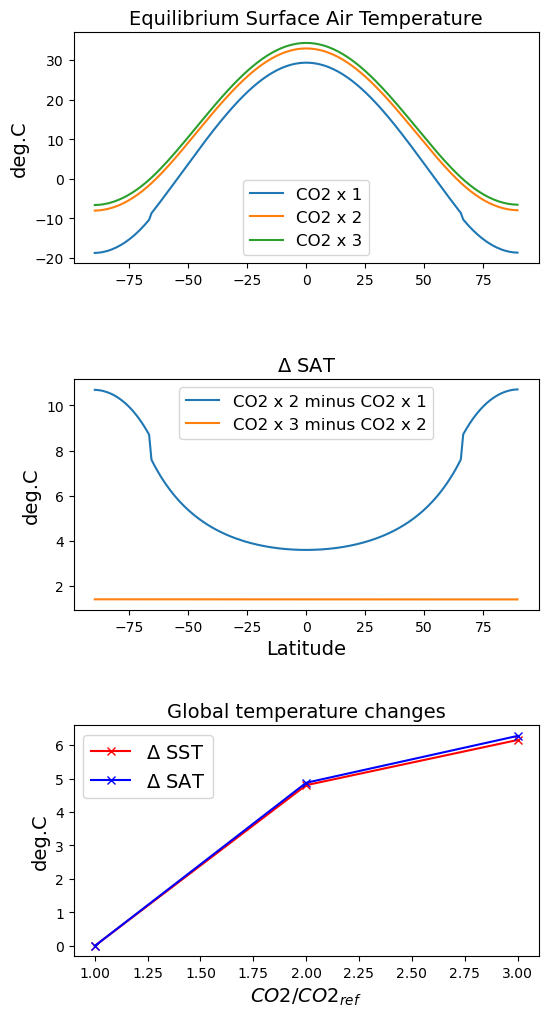

In [11]:
# (e) Impact of increasing CO2 levels on equilibrium surface temperature
#   do the same with an ocean depth of 700m
param.update({'ifig':0,'aoht':0.0})
response_CO2_levels(param,[1,2,3])

forte dépendance au niveau des pôles, on a des feedbacks positifs, plus la glace fond, plus l'ai va se réchauffer. 
On a un réchauffement de 10° aux pôles. Actuellement, on a un réchauffement de 4° aux pôles.
On a en réalité plus de feedbacks que le feedback glace, eau. 
Le gradient méridien de tempèrature entraine un transport de chaleur vers le Nord. 
Ici, le feedback positif est très grand, il faut aussi considérer les feedbacks négatifs...

In [12]:
# (f) Compute the climate feedback parameters for a doubling of CO2
# Compute then the equilibrium climate sensitivity and compare with the nonlinear model
# The initial conditons (on SAT and SST) of the perturbed experiment (with a radiative
# forcing R not equal to zero) are the end state of the previous unperturbed control experiment (resu0)

radp = 5.35*np.log(2) # Radiative forcing for a doubling of CO2 (W/m2)
param.update({'radp':radp,'restart':1,'ssti':resu0['sst'][:,-1],'sati':resu0['sat'][:,-1]})
resu_co2doubling=ebm_annual(param)
resu_co2doubling.keys()

#  compute the feedback parameters from the global averages: satmean, ASRm and OLRm

#  The albedo and planck feedback parameters are given by the linear regression of
#  satmean onto ASRm or OLRm respectively

Radiative imbalance at TOA =  0.01707815393753142  W/m2
solar constant = 1365.0 W/m2
global average SAT = 19.435315908210857 deg.C
global average SST = 22.465057964817767 deg.C
global average OLR = 241.38816803714172 W/m2
global average ASR = 241.40524619107936 W/m2
Iceline: SH = -90.0 deg. lat. / NH = 90.0 deg. lat.
 


dict_keys(['lat', 'time', 'sat', 'sst', 'ASR', 'OLR', 'PHT', 'PHTD', 'ASRm', 'OLRm', 'K', 'iceline', 'satmean', 'sstmean', 'ohtc', 'poht'])

Radiative imbalance at TOA =  0.02648662862174962  W/m2
solar constant = 1365.0 W/m2
global average SAT = 14.518110877299385 deg.C
global average SST = 17.619753641893944 deg.C
global average OLR = 237.2289774036791 W/m2
global average ASR = 237.25546403230086 W/m2
Iceline: SH = -66.0 deg. lat. / NH = 66.0 deg. lat.
 
Radiative imbalance at TOA =  0.4599682196974437  W/m2
solar constant = 1365.0 W/m2
global average SAT = 14.121479313445883 deg.C
global average SST = 17.223601835127724 deg.C
global average OLR = 236.59436690151352 W/m2
global average ASR = 237.05433512121093 W/m2
Iceline: SH = -65.0 deg. lat. / NH = 66.0 deg. lat.
 


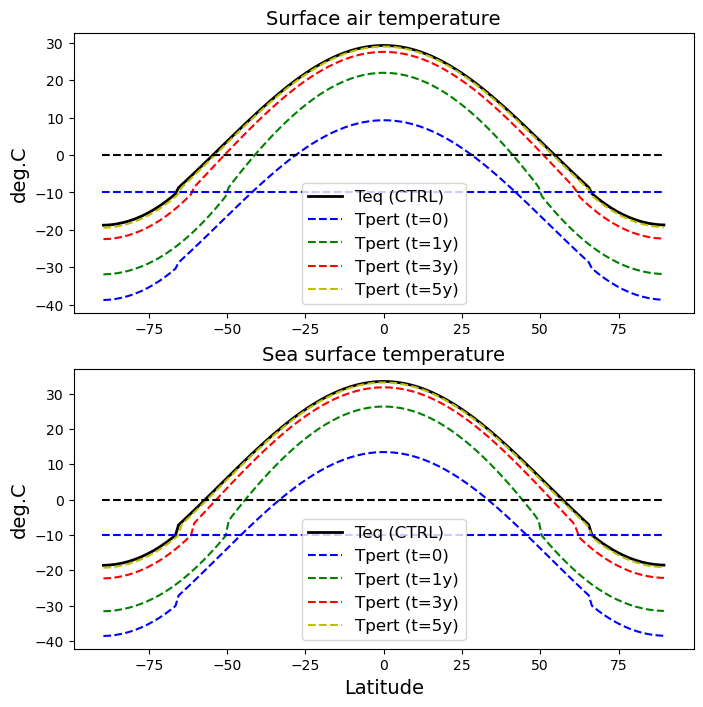

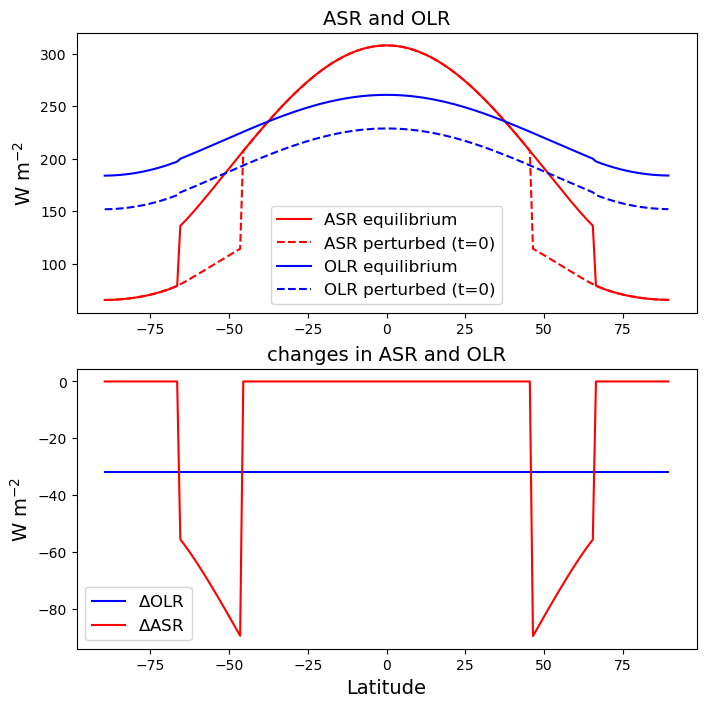

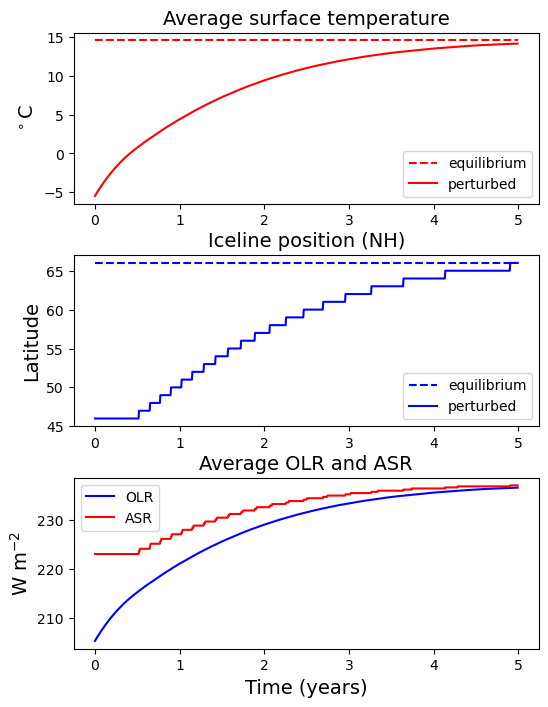

In [13]:
# (g) Response to initial perturbation (around equilibrium state obtained with radp=0.0)

delta_T=-20.0 # uniform cooling
param.update({'radp':0.0,'aoht':0.0,'falb':2,'restart':0})
d_olr,d_asr=response_initial_perturbation(param,delta_T)

# compute the feedback parameters using the changes in OLR (d_olr) and ASR (d_asr)
# associated with the initial cooling.

Radiative imbalance at TOA =  0.02648662862174962  W/m2
solar constant = 1365.0 W/m2
global average SAT = 14.518110877299385 deg.C
global average SST = 17.619753641893944 deg.C
global average OLR = 237.2289774036791 W/m2
global average ASR = 237.25546403230086 W/m2
Iceline: SH = -66.0 deg. lat. / NH = 66.0 deg. lat.
 
Radiative imbalance at TOA =  2.267387683420814  W/m2
solar constant = 1365.0 W/m2
global average SAT = 11.518254731102882 deg.C
global average SST = 14.617401730419735 deg.C
global average OLR = 232.42920756976463 W/m2
global average ASR = 234.6965952531855 W/m2
Iceline: SH = -60.0 deg. lat. / NH = 61.0 deg. lat.
 


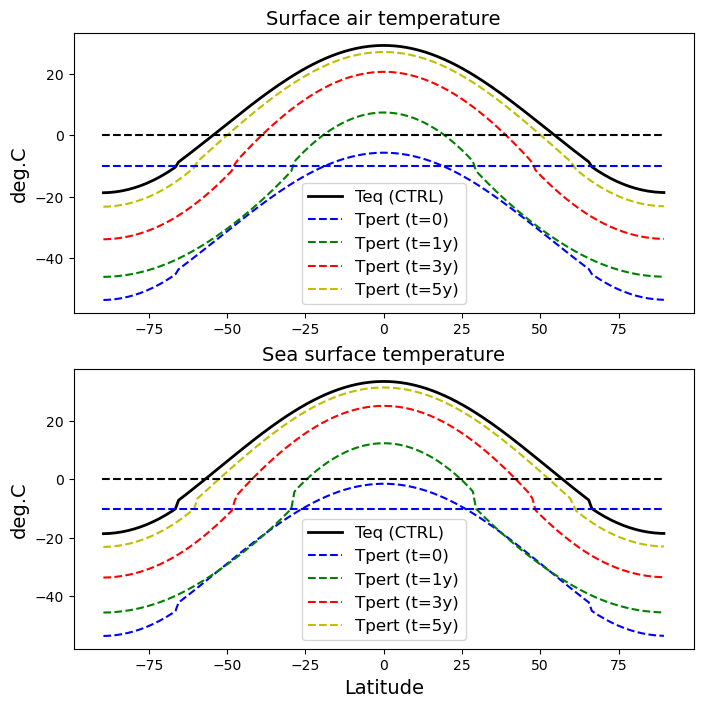

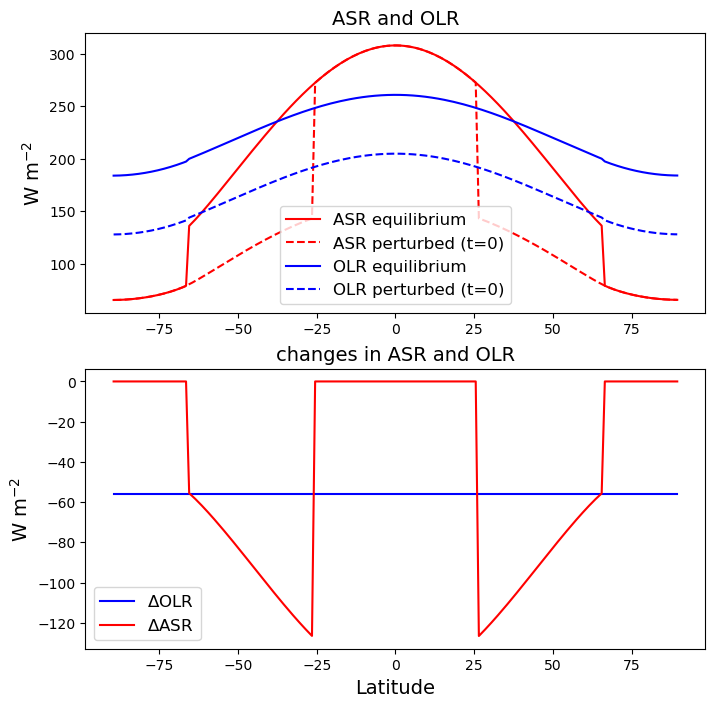

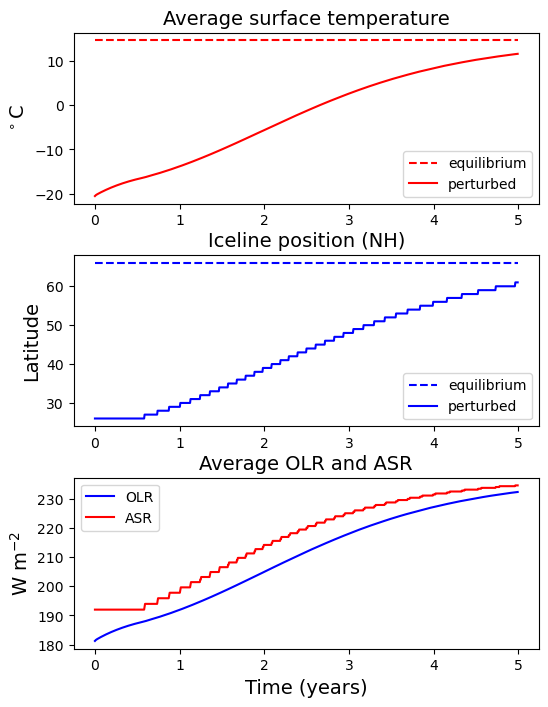

planck-1.5999932162601826 W/m2/k


In [16]:
# Let us repeat that for a cooling of -45 deg.C !!
#delta_T=-45.0 # uniform cooling
delta_T=-35.0 # uniform cooling
param.update({'radp':0.0,'aoht':0.0,'falb':2,'restart':0})
d_olr,d_asr=response_initial_perturbation(param,delta_T)

# Feedback analysis
print('planck'+str(-d_olr/delta_T),'W/m2/k')
# can you find other stable equilibria ?

Radiative imbalance at TOA =  0.028577820097720395  W/m2
solar constant = 1400.0 W/m2
global average SAT = 20.979091549028137 deg.C
global average SST = 24.086798229539014 deg.C
global average OLR = 247.56654647844502 W/m2
global average ASR = 247.5951242985428 W/m2
Iceline: SH = -90.0 deg. lat. / NH = 90.0 deg. lat.
 
Radiative imbalance at TOA =  -0.0009557153847228878  W/m2
solar constant = 1380.0 W/m2
global average SAT = 18.786879256039114 deg.C
global average SST = 21.898990898291004 deg.C
global average OLR = 244.05900680966252 W/m2
global average ASR = 244.0580510942779 W/m2
Ice free Earth !!
 
Radiative imbalance at TOA =  -0.0009677679736528268  W/m2
solar constant = 1360.0 W/m2
global average SAT = 16.57621603624165 deg.C
global average SST = 19.69111415555846 deg.C
global average OLR = 240.52194565798652 W/m2
global average ASR = 240.52097789001294 W/m2
Ice free Earth !!
 
Radiative imbalance at TOA =  -0.017017728472804926  W/m2
solar constant = 1340.0 W/m2
global average 

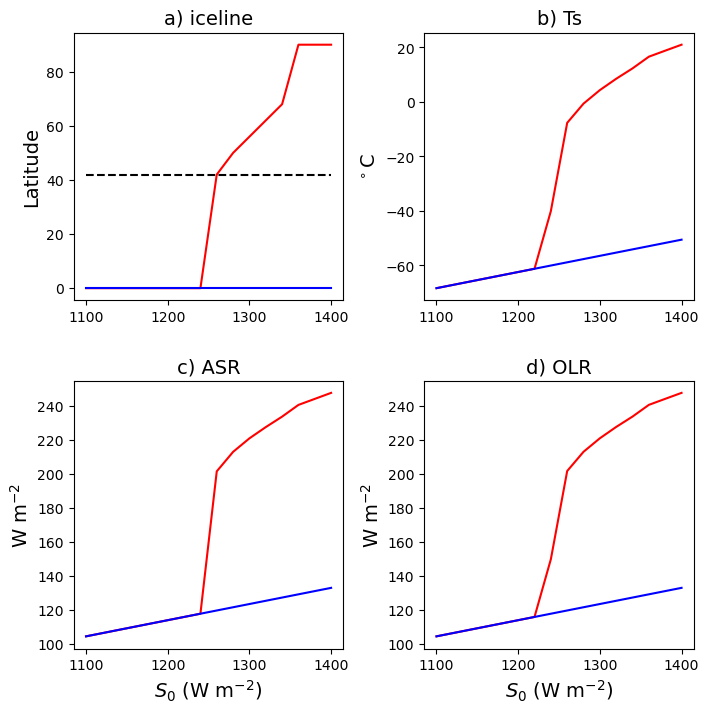

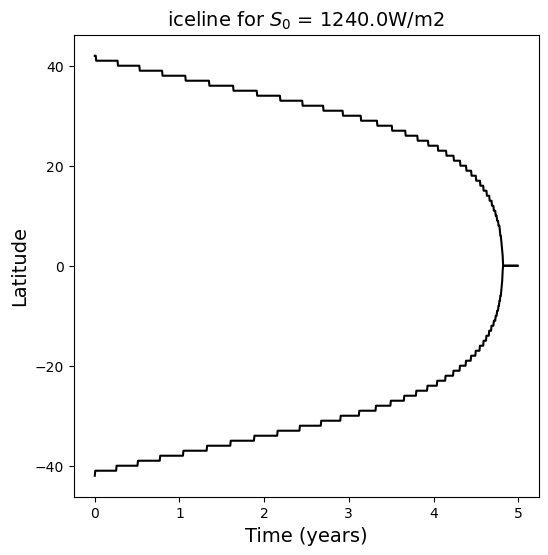

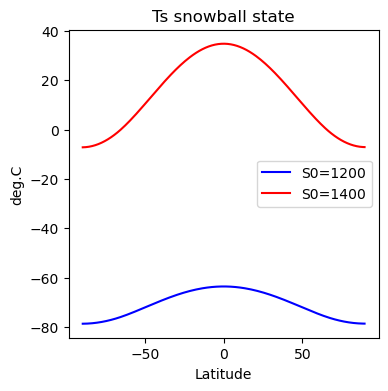

In [17]:
# (h) Sensitivity to solar constant

# first cool
S0array = np.arange(1400., 1099, -20)
param.update({'radp':0.0,'ifig':0,'restart':0,'falb':2})
resu_cool=ebm_solar_sensitivity(param,S0array)

# then warm from end state of the cooling experiment
S1array = np.flipud(S0array)
sati=resu_cool['sat_eq'][:,-1]
ssti=resu_cool['sst_eq'][:,-1]
param.update({'radp':0.0,'ifig':0,'restart':1,'falb':2,'ssti':ssti,'sati':sati})
resu_warm=ebm_solar_sensitivity(param,S1array)

# make figure
make_fig_cool_warm(S0array,S1array,resu_cool,resu_warm)

diag d'hytérésis : on part de 1400, puis on arrive au snowball. On a la présence d'un cycle d'hystérésis

In [ ]:
#   Now unfreeze the snowball state !!
#   For which S0 value can we escape the snowball ?
#   Run the EBM for one S0 value
#   Take the initial conditons (SAT and SST) corresponding to the equilibrium state obtained
#   with S0=1100 W/m2 (--> initial conditions = snowball state) 

In [18]:
sati=resu_cool['sat_eq'][:,-1] # initial condition SAT = end state of experiment with S0=1100 W/m2
ssti=resu_cool['sst_eq'][:,-1] # initial condition SST = end state of experiment with S0=1100 W/m2
# S0= # transition to ice-free state occurs at S0= ????? W/m2
param.update({'S0':S0,'radp':0.0,'restart':1,'sati':sati,'ssti':ssti,'falb':2})
resu_hot=ebm_annual(param)

Radiative imbalance at TOA =  0.007782171064370997  W/m2
solar constant = 1365.0 W/m2
global average SAT = -52.71039496011495 deg.C
global average SST = -50.34723590628008 deg.C
global average OLR = 129.66336806381616 W/m2
global average ASR = 129.67115023488043 W/m2
Snowball Earth !!
 


Radiative imbalance at TOA =  -1.860953427651996e-07  W/m2
solar constant = 1100.0 W/m2
global average SAT = -68.43943886795388 deg.C
global average SST = -66.45177375294313 deg.C
global average OLR = 104.49689781127374 W/m2
global average ASR = 104.49689762517849 W/m2
Snowball Earth !!
 
Radiative imbalance at TOA =  0.00041520310607259727  W/m2
solar constant = 1113.888888888889 W/m2
global average SAT = -67.61507019055149 deg.C
global average SST = -65.60614364360829 deg.C
global average OLR = 105.81588769511752 W/m2
global average ASR = 105.81630289822367 W/m2
Snowball Earth !!
 
Radiative imbalance at TOA =  0.0004148880287165945  W/m2
solar constant = 1127.7777777777778 W/m2
global average SAT = -66.79044169797503 deg.C
global average SST = -64.76041779507263 deg.C
global average OLR = 107.13529328324009 W/m2
global average ASR = 107.13570817126873 W/m2
Snowball Earth !!
 
Radiative imbalance at TOA =  0.0004144414338480675  W/m2
solar constant = 1141.6666666666667 W/m2
global av

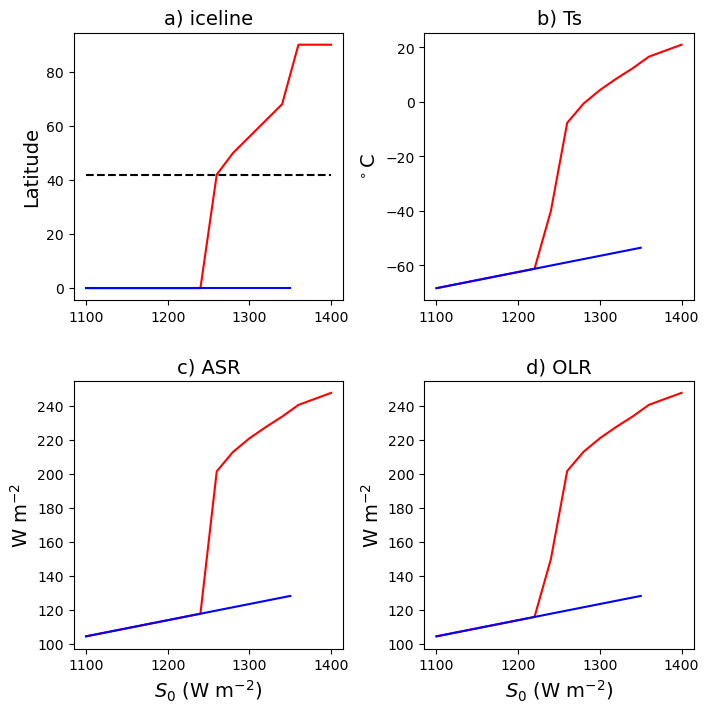

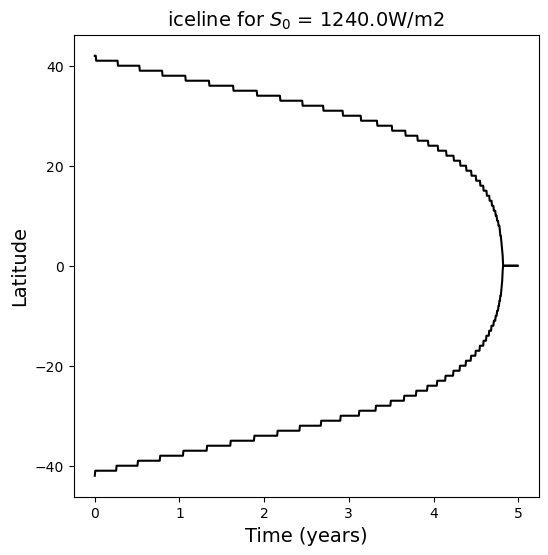

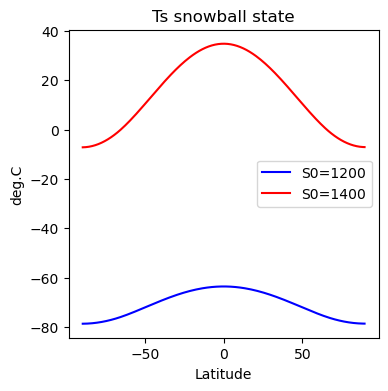

In [19]:
# warm from S0=1100 to S0=value larger than the critical S0 value found previously

S2array = np.linspace(1100.,1350 , 19)
sati=resu_cool['sat_eq'][:,-1]
ssti=resu_cool['sst_eq'][:,-1]
param.update({'dt':2.0,'radp':0.0,'ifig':0,'restart':1,'sati':sati,'ssti':ssti,'falb':2})
resu_warm_bis=ebm_solar_sensitivity(param,S2array)

# make figure
make_fig_cool_warm(S0array,S2array,resu_cool,resu_warm_bis)


Radiative imbalance at TOA =  0.007782171064370997  W/m2
solar constant = 1365.0 W/m2
global average SAT = -52.71039496011495 deg.C
global average SST = -50.34723590628008 deg.C
global average OLR = 129.66336806381616 W/m2
global average ASR = 129.67115023488043 W/m2
Snowball Earth !!
 
Radiative imbalance at TOA =  0.007782171064370997  W/m2
solar constant = 1365.0 W/m2
global average SAT = -52.71039496011495 deg.C
global average SST = -50.34723590628008 deg.C
global average OLR = 129.66336806381616 W/m2
global average ASR = 129.67115023488043 W/m2
Snowball Earth !!
 
Radiative imbalance at TOA =  0.007782171064370997  W/m2
solar constant = 1365.0 W/m2
global average SAT = -52.71039496011495 deg.C
global average SST = -50.34723590628008 deg.C
global average OLR = 129.66336806381616 W/m2
global average ASR = 129.67115023488043 W/m2
Snowball Earth !!
 


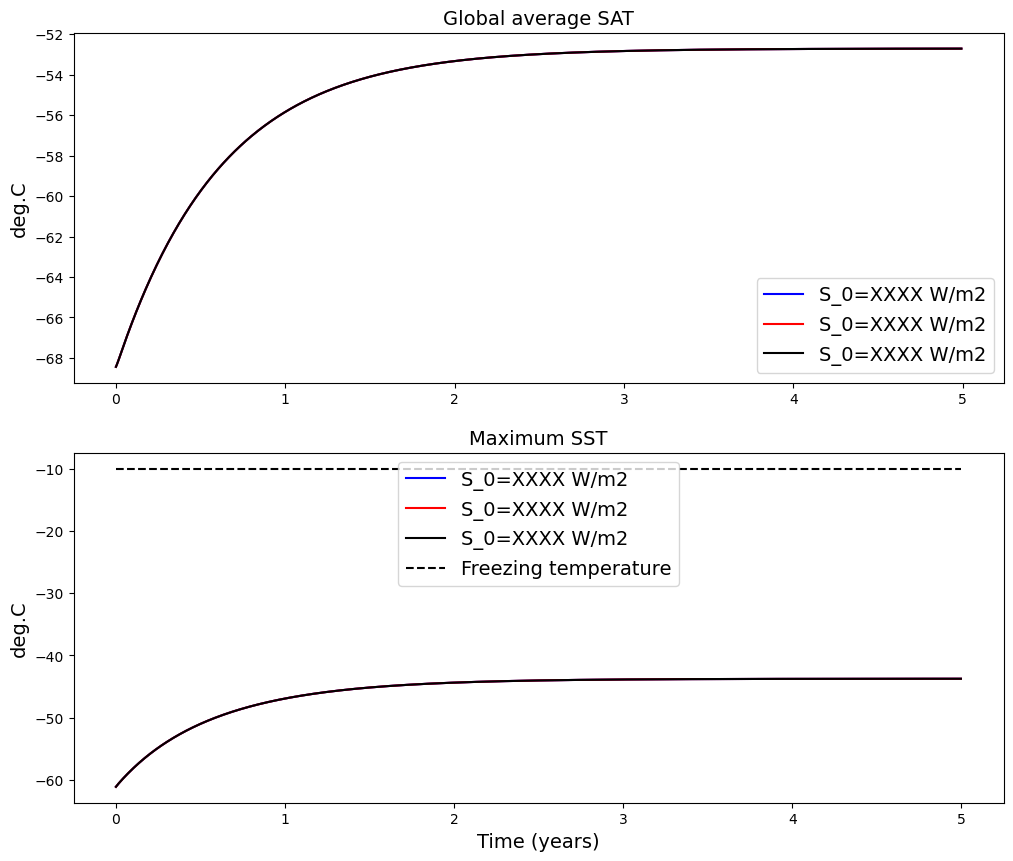

In [20]:
# transition at about S0= ???? (value found previously)
# transition from snowball to ice-free state occurs when max(SST) > Tf
# with Tf=-10 deg.C the freezing temperature (below Tf ice is present with high albedo 0.62)
sati=resu_cool['sat_eq'][:,-1]
ssti=resu_cool['sst_eq'][:,-1]
# below we run the model for 3 different values of S0 around the critical value found previously
# S0= ???? # for example take a value 2 W/m2 below the critical value
param.update({'S0':S0,'radp':0.0,'restart':1,'sati':sati,'ssti':ssti,'falb':2})
resu_hot_1=ebm_annual(param)
# S0= ??? # for example take a value 1 W/m2 below the critical value
param.update({'S0':S0,'radp':0.0,'restart':1,'sati':sati,'ssti':ssti,'falb':2})
resu_hot_2=ebm_annual(param)
# S0= ??? # critical value
param.update({'S0':S0,'radp':0.0,'restart':1,'sati':sati,'ssti':ssti,'falb':2})
resu_hot_3=ebm_annual(param)

# figure showing the time evolution of average SAT and SST for those 3 different values of S0
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.plot(resu_hot_1['time'][:-1],resu_hot_1['satmean'],'b',label='S_0=XXXX W/m2')
plt.plot(resu_hot_2['time'][:-1],resu_hot_2['satmean'],'r',label='S_0=XXXX W/m2')
plt.plot(resu_hot_2['time'][:-1],resu_hot_3['satmean'],'k',label='S_0=XXXX W/m2')
plt.legend(loc='best',fontsize=14)
plt.ylabel('deg.C',fontsize=14)
plt.title('Global average SAT',fontsize=14)
plt.subplot(2,1,2)
Tf=-10.0
plt.plot(resu_hot_1['time'],np.amax(resu_hot_1['sst'],axis=0),'b',label='S_0=XXXX W/m2')
plt.plot(resu_hot_2['time'],np.amax(resu_hot_2['sst'],axis=0),'r',label='S_0=XXXX W/m2')
plt.plot(resu_hot_2['time'],np.amax(resu_hot_3['sst'],axis=0),'k',label='S_0=XXXX W/m2')
plt.plot([0,nyears],[Tf,Tf],'k--',label='Freezing temperature')
plt.legend(loc='best',fontsize=14)
plt.xlabel('Time (years)',fontsize=14)
plt.ylabel('deg.C',fontsize=14)
plt.title('Maximum SST',fontsize=14)
plt.show(block=False)